OLS and GAM

# TotalKg = Age + Bodyweight + Dots

In [1]:
import statsmodels.api as sm
from pygam import LinearGAM, s , f
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dataset.csv", low_memory=False)

# Selecting features and target variable
X = df[['Age', 'BodyweightKg', 'Dots']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = f"TotalKg = {ols_model.params[0]:.4f} + ({ols_model.params[1]:.4f} * Age) + ({ols_model.params[2]:.4f} * BodyweightKg) + ({ols_model.params[3]:.4f} * Dots)"
print("📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = f"TotalKg ≈ {gam.coef_[0]: .4f} + f(Age) + f(BodyweightKg) + f(Dots)"
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\1326172782.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_formula = f"TotalKg = {ols_model.params[0]:.4f} + ({ols_model.params[1]:.4f} * Age) + ({ols_model.params[2]:.4f} * BodyweightKg) + ({ols_model.params[3]:.4f} * Dots)"


📌 OLS Formula Approximation:
TotalKg = -376.7298 + (-0.1798 * Age) + (4.1718 * BodyweightKg) + (1.4391 * Dots)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 6.219e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:20:11   Log-Likelihood:            -1.6918e+06
No. Observations:              303926   AIC:                         3.384e+06
Df Residuals:                  303922   BIC:                         3.384e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------

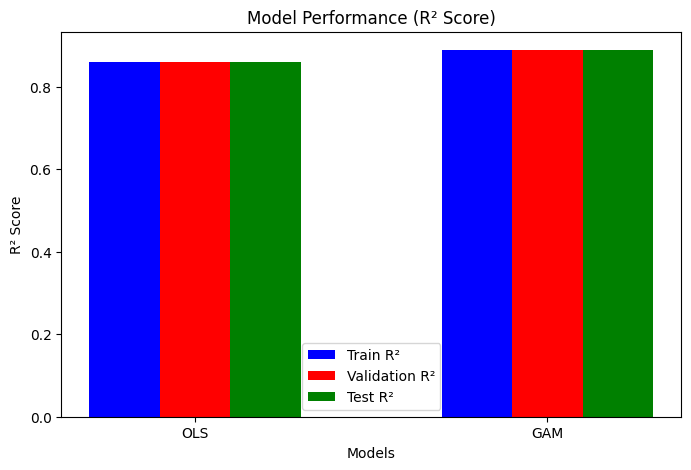

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from the output
models = ["OLS", "GAM"]
train_r2 = [0.8599, 0.8890]
val_r2 = [0.8599, 0.8890]
test_r2 = [0.8600, 0.8883]

x = np.arange(len(models))  # Label locations

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, train_r2, 0.2, label="Train R²", color="blue")
plt.bar(x, val_r2, 0.2, label="Validation R²", color="red")
plt.bar(x + 0.2, test_r2, 0.2, label="Test R²", color="green")

plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance (R² Score)")
plt.xticks(x, models)
plt.legend()
plt.show()


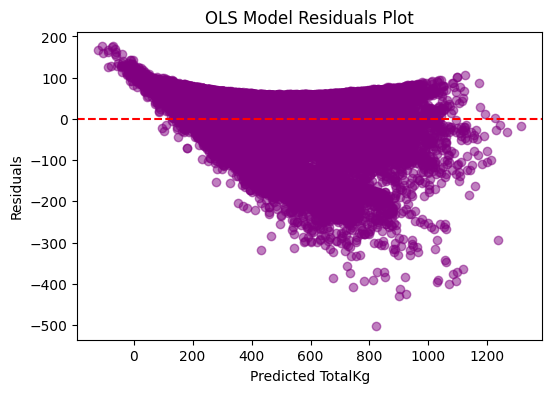

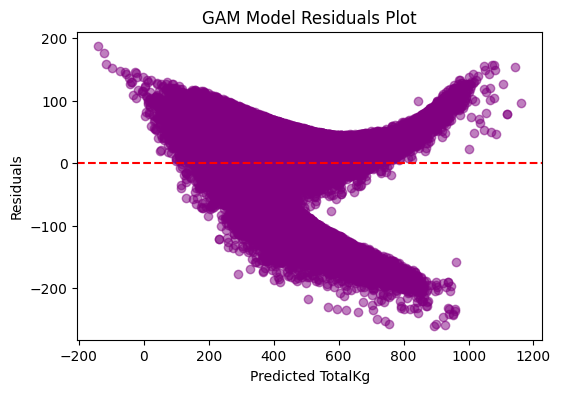

In [3]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Predicted TotalKg")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} Residuals Plot")
    plt.show()

# Plot residuals
plot_residuals(y_test, y_test_ols_pred, "OLS Model")
plot_residuals(y_test, y_test_gam_pred, "GAM Model")


# TotalKg = Age + Bodyweight + Dots + Equipment

In [2]:
X = df[['Age', 'BodyweightKg', 'Dots', 'Equipment_Multi-ply', 'Equipment_Raw', 'Equipment_Single-ply', 'Equipment_Unlimited', 'Equipment_Wraps']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Dots)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)
for i, col in enumerate(X_train.columns[3:]):  # Start from Equipment columns
    ols_formula += " + ({:.4f} * {})".format(ols_model.params[i+4], col)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + f(3)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Dots) + g(Equipment)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\2904156300.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\2904156300.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_formula += " + ({:.4f} * {})".format(ols_model.params[i+4], col)



📌 OLS Formula Approximation:
TotalKg = -324.5524 + (-0.1954 * Age) + (4.1242 * BodyweightKg) + (1.4559 * Dots) + (-31.4042 * Equipment_Multi-ply) + (-51.0277 * Equipment_Raw) + (-67.6013 * Equipment_Single-ply) + (-124.9424 * Equipment_Unlimited) + (-49.5769 * Equipment_Wraps)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 2.721e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:26:07   Log-Likelihood:            -1.6891e+06
No. Observations:              303926   AIC:                         3.378e+06
Df Residuals:                  303918   BIC:                         3.378e+06
Df Model:                           7                                         
Covariance

# TotalKg = Age + BodyweightKg + Wiks

In [3]:
X = df[['Age', 'BodyweightKg', 'Wilks']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Wilks)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Wilks)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\856392704.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]



📌 OLS Formula Approximation:
TotalKg = -376.0948 + (-0.1722 * Age) + (4.2335 * BodyweightKg) + (1.4297 * Wilks)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.984e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:27:47   Log-Likelihood:            -1.6968e+06
No. Observations:              303926   AIC:                         3.394e+06
Df Residuals:                  303922   BIC:                         3.394e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------

# TotalKg = Age + BodyweightKg + Glossbrenner

In [4]:
X = df[['Age', 'BodyweightKg', 'Glossbrenner']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Glossbrenner)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Glossbrenner)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

# Mean Regressor Baseline (weak model)
mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")


evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\3414000453.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]



📌 OLS Formula Approximation:
TotalKg = -368.8011 + (-0.0680 * Age) + (3.9163 * BodyweightKg) + (1.5761 * Glossbrenner)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.219e+06
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:30:31   Log-Likelihood:            -1.6004e+06
No. Observations:              303926   AIC:                         3.201e+06
Df Residuals:                  303922   BIC:                         3.201e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------

# TotalKg = Age + BodyweightKg + Best3SquatKg

In [5]:
X = df[['Age', 'BodyweightKg', 'Best3SquatKg']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Best3SquatKg)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Best3SquatKg)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

# Mean Regressor Baseline (weak model)
mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\1325545452.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]



📌 OLS Formula Approximation:
TotalKg = 18.1339 + (0.3143 * Age) + (0.3620 * BodyweightKg) + (2.4230 * Best3SquatKg)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.234e+06
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:31:13   Log-Likelihood:            -1.5137e+06
No. Observations:              303926   AIC:                         3.027e+06
Df Residuals:                  303922   BIC:                         3.027e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------

# TotalKg = Age + BodyweightKg + Best3BenchKg

In [6]:
X = df[['Age', 'BodyweightKg', 'Best3BenchKg']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Best3BenchKg)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Best3BenchKg)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

# Mean Regressor Baseline (weak model)
mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\1610619690.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]



📌 OLS Formula Approximation:
TotalKg = 96.1847 + (-0.6541 * Age) + (0.5570 * BodyweightKg) + (3.2228 * Best3BenchKg)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.082e+06
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:31:51   Log-Likelihood:            -1.6169e+06
No. Observations:              303926   AIC:                         3.234e+06
Df Residuals:                  303922   BIC:                         3.234e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------

# TotalKg = Age + Bodyweight + Best3DeadliftKg

In [7]:
X = df[['Age', 'BodyweightKg', 'Best3DeadliftKg']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = "TotalKg = {:.4f} + ({:.4f} * Age) + ({:.4f} * BodyweightKg) + ({:.4f} * Best3DeadliftKg)".format(
    ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]
)

print("\n📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = "TotalKg ≈ {:.4f} + f(Age) + f(BodyweightKg) + f(Best3DeadliftKg)".format(gam.coef_[0])
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

# Mean Regressor Baseline (weak model)
mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7940\1601350351.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model.params[0], ols_model.params[1], ols_model.params[2], ols_model.params[3]



📌 OLS Formula Approximation:
TotalKg = -67.4475 + (-0.0510 * Age) + (0.7133 * BodyweightKg) + (2.5195 * Best3DeadliftKg)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.482e+06
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:32:13   Log-Likelihood:            -1.5727e+06
No. Observations:              303926   AIC:                         3.145e+06
Df Residuals:                  303922   BIC:                         3.145e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----

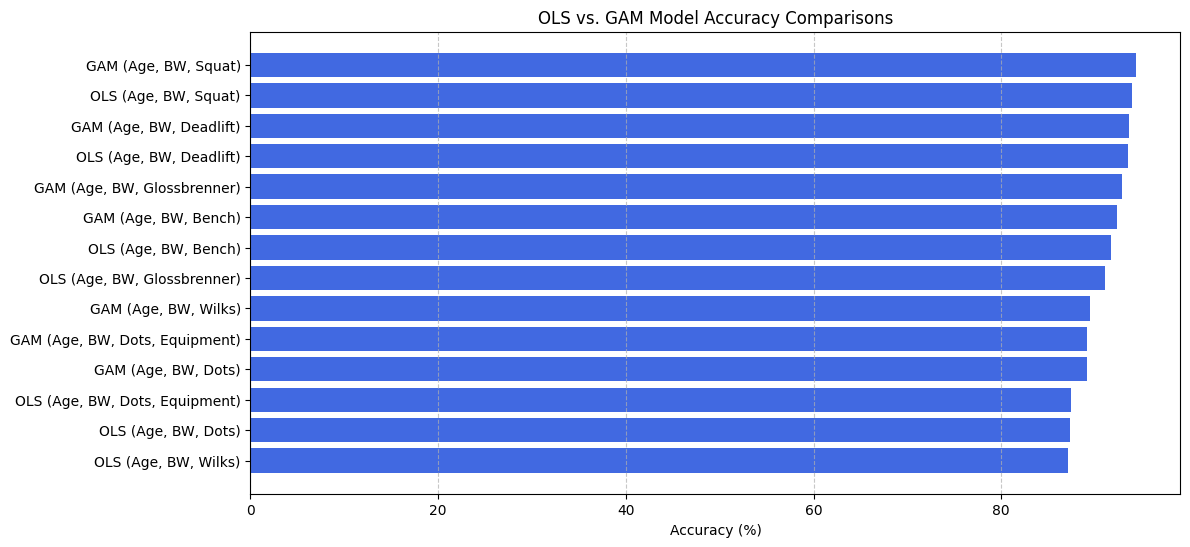

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# OLS and GAM accuracy results
model_names = [
    "OLS (Age, BW, Dots)", "GAM (Age, BW, Dots)",
    "OLS (Age, BW, Dots, Equipment)", "GAM (Age, BW, Dots, Equipment)",
    "OLS (Age, BW, Wilks)", "GAM (Age, BW, Wilks)",
    "OLS (Age, BW, Glossbrenner)", "GAM (Age, BW, Glossbrenner)",
    "OLS (Age, BW, Squat)", "GAM (Age, BW, Squat)",
    "OLS (Age, BW, Bench)", "GAM (Age, BW, Bench)",
    "OLS (Age, BW, Deadlift)", "GAM (Age, BW, Deadlift)"
]

accuracy_values = [
    87.28, 89.15, 87.39, 89.16, 87.16, 89.47, 91.03, 92.85, 93.98, 94.38, 91.68, 92.30, 93.51, 93.61
]

# Sorting models by accuracy for better visualization
sorted_indices = np.argsort(accuracy_values)
model_names_sorted = [model_names[i] for i in sorted_indices]
accuracy_sorted = [accuracy_values[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(model_names_sorted, accuracy_sorted, color='royalblue')
plt.xlabel('Accuracy (%)')
plt.title('OLS vs. GAM Model Accuracy Comparisons')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("dataset.csv", low_memory = False)

In [6]:
data.shape

(506544, 17)

In [3]:
import statsmodels.api as sm
from pygam import LinearGAM, s , f
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dataset.csv", low_memory=False)

# Selecting features and target variable
X = df[['Age', 'BodyweightKg', 'Dots']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract OLS Formula
ols_formula = f"TotalKg = {ols_model.params[0]:.1f} + ({ols_model.params[1]:.1f} * Age) + ({ols_model.params[2]:.1f} * BodyweightKg) + ({ols_model.params[3]:.1f} * Dots)"
print("📌 OLS Formula Approximation:")
print(ols_formula)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Extract GAM Formula
gam_formula = f"TotalKg ≈ {gam.coef_[0]: .1f} + f(Age) + f(BodyweightKg) + f(Dots)"
print("\n📌 GAM Formula Approximation:")
print(gam_formula)

# Prediction Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")

C:\Users\Sahil\AppData\Local\Temp\ipykernel_2440\1317342636.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_formula = f"TotalKg = {ols_model.params[0]:.1f} + ({ols_model.params[1]:.1f} * Age) + ({ols_model.params[2]:.1f} * BodyweightKg) + ({ols_model.params[3]:.1f} * Dots)"


📌 OLS Formula Approximation:
TotalKg = -376.7 + (-0.2 * Age) + (4.2 * BodyweightKg) + (1.4 * Dots)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 6.219e+05
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:04:27   Log-Likelihood:            -1.6918e+06
No. Observations:              303926   AIC:                         3.384e+06
Df Residuals:                  303922   BIC:                         3.384e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [9]:
import statsmodels.api as sm
from pygam import LinearGAM, s, f
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dataset.csv", low_memory=False)

# Selecting features and target variable
X = df[['Age', 'BodyweightKg', 'Dots']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# OLS Formulas
ols_formula_dec = f"TotalKg = {ols_model.params[0]:.4f} + ({ols_model.params[1]:.4f} * Age) + ({ols_model.params[2]:.4f} * BodyweightKg) + ({ols_model.params[3]:.4f} * Dots)"
ols_formula_int = f"TotalKg = {int(round(ols_model.params[0]))} + ({int(round(ols_model.params[1]))} * Age) + ({int(round(ols_model.params[2]))} * BodyweightKg) + ({int(round(ols_model.params[3]))} * Dots)"

print("📌 OLS Formula (With Decimals):")
print(ols_formula_dec)
print("📌 OLS Formula (Rounded, No Decimals):")
print(ols_formula_int)
print(ols_model.summary())

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# GAM Formulas
gam_formula_dec = f"TotalKg ≈ {gam.coef_[0]:.4f} + f(Age) + f(BodyweightKg) + f(Dots)"
gam_formula_int = f"TotalKg ≈ {int(round(gam.coef_[0]))} + f(Age) + f(BodyweightKg) + f(Dots)"

print("\n📌 GAM Formula (With Decimals):")
print(gam_formula_dec)
print("📌 GAM Formula (Rounded, No Decimals):")
print(gam_formula_int)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions & Evaluations
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

mean_total = y_train.mean()

# Predict the same mean value for all samples
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")


C:\Users\Sahil\AppData\Local\Temp\ipykernel_2440\3368221164.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_formula_dec = f"TotalKg = {ols_model.params[0]:.4f} + ({ols_model.params[1]:.4f} * Age) + ({ols_model.params[2]:.4f} * BodyweightKg) + ({ols_model.params[3]:.4f} * Dots)"
C:\Users\Sahil\AppData\Local\Temp\ipykernel_2440\3368221164.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_formula_int = f"TotalKg = {int(round(ols_model.params[0]))} + ({int(round(ols_model.params[1]))} * Age) + ({int(round(ols_model.params[2]))} * BodyweightKg) + ({int(round(ols_model.params[3]))} * Dots)"


📌 OLS Formula (With Decimals):
TotalKg = -376.7298 + (-0.1798 * Age) + (4.1718 * BodyweightKg) + (1.4391 * Dots)
📌 OLS Formula (Rounded, No Decimals):
TotalKg = -377 + (0 * Age) + (4 * BodyweightKg) + (1 * Dots)
                            OLS Regression Results                            
Dep. Variable:                TotalKg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 6.219e+05
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:            -1.6918e+06
No. Observations:              303926   AIC:                         3.384e+06
Df Residuals:                  303922   BIC:                         3.384e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                        

In [1]:
import statsmodels.api as sm
from pygam import LinearGAM, s
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dataset.csv", low_memory=False)

# Selecting features and target variable
X = df[['Age', 'BodyweightKg', 'Dots']]
y = df['TotalKg']

# Splitting data into Train (60%), Validation (20%), Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add intercept for OLS
X_train_ols = sm.add_constant(X_train)
X_val_ols = sm.add_constant(X_val)
X_test_ols = sm.add_constant(X_test)

# Train OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Extract and display OLS formulas
params = ols_model.params
print("\n📌 OLS Formula (Precise):")
print(f"TotalKg = {params[0]:.4f} + ({params[1]:.4f} * Age) + ({params[2]:.4f} * BodyweightKg) + ({params[3]:.4f} * Dots)")

rounded_params = [round(p) for p in params]
intercept_r, age_r, bw_r, dots_r = rounded_params
print("\n📌 OLS Formula (No Decimals):")
print(f"TotalKg ≈ {intercept_r} + ({age_r} * Age) + ({bw_r} * BodyweightKg) + ({dots_r} * Dots)")

# Train GAM model
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Display GAM formulas
print("\n📌 GAM Formula (Precise):")
print(f"TotalKg ≈ {gam.coef_[0]:.4f} + f(Age) + f(BodyweightKg) + f(Dots)")

gam_intercept_rounded = round(gam.coef_[0])
print("\n📌 GAM Formula (No Decimals):")
print(f"TotalKg ≈ {gam_intercept_rounded} + f(Age) + f(BodyweightKg) + f(Dots)")

# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Accuracy: {accuracy:.2f}% (MAPE: {mape:.2f}%)")
    print("-" * 40)

# Predictions for all models
y_train_ols_pred = ols_model.predict(X_train_ols)
y_val_ols_pred = ols_model.predict(X_val_ols)
y_test_ols_pred = ols_model.predict(X_test_ols)

# Manually compute OLS predictions with no-decimal coefficients
y_test_ols_rounded_pred = (
    intercept_r + age_r * X_test['Age'] +
    bw_r * X_test['BodyweightKg'] + dots_r * X_test['Dots']
)

# GAM predictions (same for both because intercept rounding is for display)
y_train_gam_pred = gam.predict(X_train)
y_val_gam_pred = gam.predict(X_val)
y_test_gam_pred = gam.predict(X_test)

# Mean Regressor predictions
mean_total = y_train.mean()
y_train_mean_pred = np.full_like(y_train, mean_total)
y_val_mean_pred = np.full_like(y_val, mean_total)
y_test_mean_pred = np.full_like(y_test, mean_total)

# Evaluate models
evaluate_model(y_train, y_train_mean_pred, "Mean Regressor Train")
evaluate_model(y_val, y_val_mean_pred, "Mean Regressor Validation")
evaluate_model(y_test, y_test_mean_pred, "Mean Regressor Test")

evaluate_model(y_train, y_train_ols_pred, "OLS Train")
evaluate_model(y_val, y_val_ols_pred, "OLS Validation")
evaluate_model(y_test, y_test_ols_pred, "OLS Test (Precise)")

evaluate_model(y_test, y_test_ols_rounded_pred, "OLS Test (No Decimals)")

evaluate_model(y_train, y_train_gam_pred, "GAM Train")
evaluate_model(y_val, y_val_gam_pred, "GAM Validation")
evaluate_model(y_test, y_test_gam_pred, "GAM Test")



📌 OLS Formula (Precise):
TotalKg = -376.7298 + (-0.1798 * Age) + (4.1718 * BodyweightKg) + (1.4391 * Dots)

📌 OLS Formula (No Decimals):
TotalKg ≈ -377 + (0 * Age) + (4 * BodyweightKg) + (1 * Dots)


C:\Users\Sahil\AppData\Local\Temp\ipykernel_10108\3582930246.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"TotalKg = {params[0]:.4f} + ({params[1]:.4f} * Age) + ({params[2]:.4f} * BodyweightKg) + ({params[3]:.4f} * Dots)")



📌 GAM Formula (Precise):
TotalKg ≈ 176.7293 + f(Age) + f(BodyweightKg) + f(Dots)

📌 GAM Formula (No Decimals):
TotalKg ≈ 177 + f(Age) + f(BodyweightKg) + f(Dots)

📊 Mean Regressor Train Evaluation Metrics:
R² Score: 0.0000
MAE: 139.60
RMSE: 169.07
Accuracy: 64.56% (MAPE: 35.44%)
----------------------------------------

📊 Mean Regressor Validation Evaluation Metrics:
R² Score: -0.0000
MAE: 140.10
RMSE: 169.42
Accuracy: 64.49% (MAPE: 35.51%)
----------------------------------------

📊 Mean Regressor Test Evaluation Metrics:
R² Score: -0.0000
MAE: 139.63
RMSE: 168.82
Accuracy: 64.61% (MAPE: 35.39%)
----------------------------------------

📊 OLS Train Evaluation Metrics:
R² Score: 0.8599
MAE: 53.27
RMSE: 63.28
Accuracy: 87.28% (MAPE: 12.72%)
----------------------------------------

📊 OLS Validation Evaluation Metrics:
R² Score: 0.8599
MAE: 53.34
RMSE: 63.41
Accuracy: 87.27% (MAPE: 12.73%)
----------------------------------------

📊 OLS Test (Precise) Evaluation Metrics:
R² Score: 0.860

In [2]:
df.columns

Index(['Name', 'Gender', 'Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg',
       'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner',
       'Age_Group', 'Equipment_Multi-ply', 'Equipment_Raw',
       'Equipment_Single-ply', 'Equipment_Unlimited', 'Equipment_Wraps'],
      dtype='object')

In [3]:
df

,Name,Gender,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Age_Group,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Unlimited,Equipment_Wraps
0,Elvis Žaļims,1,13.0,59.1,85.0,40.0,100.0,225.0,192.30,194.58,190.17,1,0,0,0,0,1
1,Aļona Staņēviča,0,20.5,62.4,52.5,45.0,100.0,197.5,213.66,213.65,188.68,4,0,0,0,0,1
2,Tomass Rihards Chiapas,1,11.0,66.9,80.0,47.5,100.0,227.5,176.49,176.67,171.56,0,0,0,0,0,1
3,Lauris Kalašņikovs,1,13.0,60.3,110.0,80.0,160.0,350.0,294.21,297.15,290.09,1,0,0,0,0,1
4,Laura Šembele,0,13.5,73.5,65.0,40.0,110.0,215.0,211.67,207.03,182.25,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506539,Greg Doucette,1,34.0,90.0,227.5,227.5,275.0,730.0,472.02,466.03,446.64,5,0,1,0,0,0
506540,Greg Doucette,1,34.0,90.0,227.5,227.5,275.0,730.0,472.02,466.03,446.64,5,0,1,0,0,0
506541,Jason Argue,1,29.0,100.0,217.5,177.5,275.0,670.0,412.40,407.75,389.45,5,0,1,0,0,0
506542,Matt Bertrand,1,26.0,110.0,240.0,165.0,227.5,632.5,374.61,372.22,355.75,5,0,1,0,0,0
